<a href="https://colab.research.google.com/github/sam-08/BCS-Speech-Emotion-Recognition/blob/main/Assignments/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Question 1 : Linear Regression
To check whether you are able to build simple linear regression model from scratch or not.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
!wget --no-check-certificate https://github.com/adigup390/datasets/raw/main/X.npy -O X.npy
!wget --no-check-certificate https://github.com/adigup390/datasets/raw/main/y.npy -O y.npy

--2021-05-26 22:39:10--  https://github.com/adigup390/datasets/raw/main/X.npy
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/adigup390/datasets/main/X.npy [following]
--2021-05-26 22:39:10--  https://raw.githubusercontent.com/adigup390/datasets/main/X.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 528 [application/octet-stream]
Saving to: ‘X.npy’

X.npy               100%[===================>]     528  --.-KB/s    in 0s      

2021-05-26 22:39:10 (27.4 MB/s) - ‘X.npy’ saved [528/528]

--2021-05-26 22:39:11--  https://github.com/adigup390/datasets/raw/main/y.npy
Resolving github.com (github

In [ ]:
def load_data_LR():
  # Implement this function to read the dataset using the path declared in path_X and path_y
  # should return the X and y data
  # use np.load() to load the data google it you will get to know how to do it

  path_X = "X.npy"
  path_y = "y.npy"

  # Write your code here ----------
  X=np.load(path_X)
  y=np.load(path_y)
  # -------------------------------

  return X, y

In [ ]:
def get_linear_model(X, y):
  # This shoudl return a proper linear model without bias of type y = XW

  # Write your code here ----------
  D=X.shape[1]
  out_shape=y.shape[1]  
  # -------------------------------

  W = np.random.randn(D, out_shape)

  return W

In [ ]:
def MSE(y, y_pred):
  # should return the mean square error between the actual y and predicted y

  # Write your code here ----------
  error=np.mean((y-y_pred)*(y-y_pred))
  # -------------------------------

  return error

In [ ]:
def train_by_algebra(X, y):
  # should return the trained weight 'W' using the linear algebra method i.e. setting dE/dW = 0

  # Write your code here ----------
  W=(np.linalg.inv(((X.T).dot(X))).dot(X.T)).dot(y)
  # -------------------------------

  return W

In [ ]:
def train_by_GD(X, y, epochs=5, lr=0.01):
  # should return the trained weight 'W' using the gradient descent for number of iterations equals to epochs
  # should also return error history int the cariable error_hist.shape = (epochs,); error_hist[i] = mean square error after epoch i-1
  # should also print mean square error after each epoch/ iteration
  # lr = "learning rate" i.e. eta
  
  # Write your code here ----------
  W=get_linear_model(X,y)
  error_hist=[]

  for i in range(epochs):
    y_pred=np.dot(X,W);
    deriv=np.dot(-1*(X.T),(y-y_pred))
    W=W-lr*deriv
    error_hist.append(MSE(y,y_pred))
    i=i+1
  # -------------------------------

  return W, error_hist

### Now write a complete code using the function defined above to learn the model for following cases:

##### Learn **W** using linear algebra method and prints mean square error between actual y and predicted y. Use `y_pred = XW`. Also plot y_pred and y on different plots.

Mean square error is 5.490059820643823 



Text(0.5, 1.0, 'y_pred vs X')

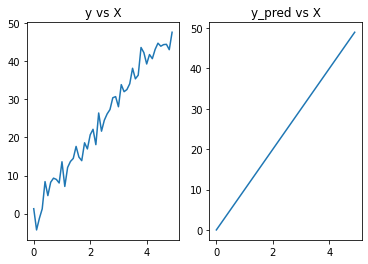

In [ ]:
# Write your code here ----------
import matplotlib.pyplot as plt
X,y=load_data_LR()
W=train_by_algebra(X,y)
y_pred=np.dot(X,W);
error=MSE(y,y_pred)
print("Mean square error is", error,"\n")
plt.subplot(1,2,1)
plt.plot(X,y)
plt.title("y vs X")
plt.subplot(1,2,2)
plt.plot(X,y_pred)
plt.title("y_pred vs X")

# -------------------------------

##### Learn **W** using gradient descent method for following learning rates, `lr = [0.01, 0.001, 0.0001]` for **10 epochs**. Plot **MSE vs epochs** for each of them.  Also plot y_pred and y on different plots.

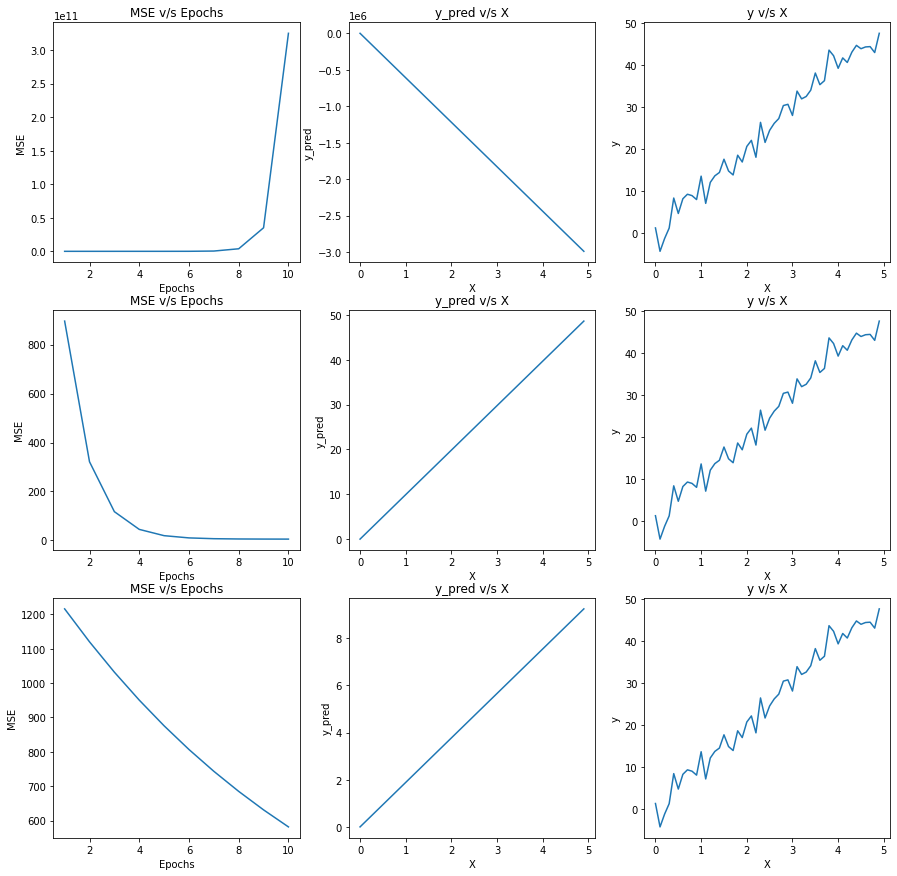

In [ ]:
# Write your code here ----------
X,y=load_data_LR()
i=0
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(15,15))
for j in [0.01, 0.001 ,0.0001]:
   W,error_hist=train_by_GD(X,y,10, j)
   axes[i,0].plot([1,2,3,4,5,6,7,8,9,10],error_hist)
   axes[i,0].set(title='MSE v/s Epochs', xlabel='Epochs', ylabel='MSE')
   y_pred=np.dot(X,W)
   axes[i,1].plot(X,y_pred)
   axes[i,1].set(title='y_pred v/s X', xlabel='X', ylabel='y_pred')
   axes[i,2].plot(X,y)
   axes[i,2].set(title='y v/s X', xlabel='X', ylabel='y')
   i+=1


# -------------------------------

## Question 2: Image Classification in Tensorflow using Deep Learning
To check whether you are able to build a given neural network model in tensorflow or not. First we will build a fully connected NN model second we will build a CNN model.

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
def plot_history(history):
  # function to plot accuracy vs epoch

  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')

In [ ]:
def load_data_cifar10_norm():
  # should return the normalised cifar10 dataset by loading it from tensorflow
  # link: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/

  # Write your code here ----------
  (x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()
  x_train,x_test=x_train/255.0,x_test/255.0
  # -------------------------------

  return x_train, y_train, x_test, y_test

### Define a fully connected neural network model with following attributes:

*   Total number of **hidden layers = 4**, all with **relu** activation
*   Number of neurons in **first hidden layer = 7200**
*   Number of neurons in **second hidden layer = 2304**
*   Number of neurons in **third hidden layer = 1024**
*   Number of neurons in **fourth hidden layer = 64**


In [ ]:
def build_fc_model(input_shape=(32, 32, 3), num_class=10):
  # should return a sequential model defined based on the above attributes
  # do not compile the model

  # Write your code here ----------
  model=tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(7200,activation='relu',input_shape=(32,32,3)),
  tf.keras.layers.Dense(2304,activation='relu'),
  tf.keras.layers.Dense(1024,activation='relu'),
  tf.keras.layers.Dense(64,activation='relu'),
  tf.keras.layers.Dense(10,activation='softmax')
])
  # -------------------------------

  return model

### Define a CNN model with following attribute:

*   Total number of **hidden layer = 4**
*   After every convolutional layer there must be a MaxPoolingLayer of size (2, 2)
*   Total number of convolutional layer = 3, all with **relu** activation.
    *    Number of filters in **first convolutional layer = 32**
    *    Number of filters in **second convolutional layer = 64**
    *    Number of filters in **third convolutional layer = 64**
*   After all convolutional layer flatten the output and use **dense layer of 64 neurons**



In [ ]:
def build_cnn_model(input_shape=(32, 32, 3), num_class=10):
  # should return a sequential model defined based on the above attributes
  # do not compile the model

  # Write your code here ----------
  import keras_preprocessing
  from keras_preprocessing import image
  model=tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32,(3,3), activation='relu',input_shape=(32,32,3)),                                  
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64,activation='relu'),
  tf.keras.layers.Dense(10,activation='softmax')

  ])

  # -------------------------------

  return model

### Compile and train the fully connected neural network model using the above functions.

170500096/170498071 [==============================] - 4s 0us/step
Epoch 1/10
98/98 [==============================] - 8s 43ms/step - loss: 4.3924 - accuracy: 0.1190 - val_loss: 2.2880 - val_accuracy: 0.1016
Epoch 2/10
98/98 [==============================] - 4s 40ms/step - loss: 2.2219 - accuracy: 0.1593 - val_loss: 2.1915 - val_accuracy: 0.2014
Epoch 3/10
98/98 [==============================] - 4s 40ms/step - loss: 2.1065 - accuracy: 0.2110 - val_loss: 1.9903 - val_accuracy: 0.2675
Epoch 4/10
98/98 [==============================] - 4s 40ms/step - loss: 1.9888 - accuracy: 0.2713 - val_loss: 1.9709 - val_accuracy: 0.2545
Epoch 5/10
98/98 [==============================] - 4s 40ms/step - loss: 1.9162 - accuracy: 0.3050 - val_loss: 1.9451 - val_accuracy: 0.3047
Epoch 6/10
98/98 [==============================] - 4s 41ms/step - loss: 1.8676 - accuracy: 0.3256 - val_loss: 1.9465 - val_accuracy: 0.3228
Epoch 7/10
98/98 [==============================] - 4s 41ms/step - loss: 1.8237 - accur

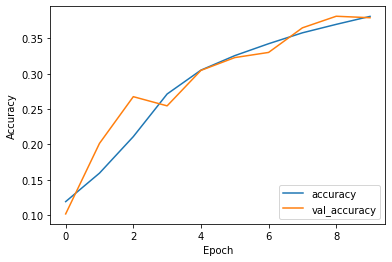

In [ ]:
# Write your code here ----------
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
x_train, y_train, x_test, y_test=load_data_cifar10_norm()
model=build_fc_model(input_shape=(32, 32, 3), num_class=10)

model.compile(optimizer='rmsprop',loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

 
# -------------------------------
history = model.fit(x_train, y_train, epochs=10, batch_size=512,
                    validation_data=(x_test, y_test))
plot_history(history)
model.summary()

### Compile and train the CNN model using the above functions.

Epoch 1/10
98/98 [==============================] - 31s 22ms/step - loss: 2.0117 - accuracy: 0.2661 - val_loss: 1.8070 - val_accuracy: 0.3437
Epoch 2/10
98/98 [==============================] - 2s 16ms/step - loss: 1.7441 - accuracy: 0.3767 - val_loss: 1.6166 - val_accuracy: 0.4224
Epoch 3/10
98/98 [==============================] - 2s 16ms/step - loss: 1.6037 - accuracy: 0.4296 - val_loss: 1.5078 - val_accuracy: 0.4648
Epoch 4/10
98/98 [==============================] - 2s 16ms/step - loss: 1.5080 - accuracy: 0.4675 - val_loss: 1.4143 - val_accuracy: 0.4975
Epoch 5/10
98/98 [==============================] - 2s 16ms/step - loss: 1.4305 - accuracy: 0.4917 - val_loss: 1.5460 - val_accuracy: 0.4671
Epoch 6/10
98/98 [==============================] - 2s 16ms/step - loss: 1.3674 - accuracy: 0.5204 - val_loss: 1.3472 - val_accuracy: 0.5187
Epoch 7/10
98/98 [==============================] - 2s 16ms/step - loss: 1.3137 - accuracy: 0.5379 - val_loss: 1.2546 - val_accuracy: 0.5612
Epoch 8/10
9

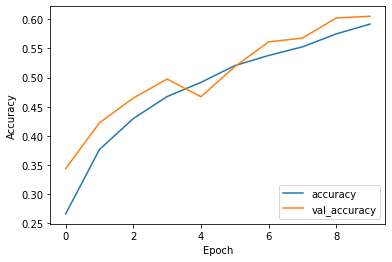

In [ ]:
# Write your code here ----------
x_train, y_train, x_test, y_test=load_data_cifar10_norm()
model=build_cnn_model(input_shape=(32, 32, 3), num_class=10)

model.compile(optimizer='rmsprop',loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
# -------------------------------

history = model.fit(x_train, y_train, epochs=10, batch_size=512,
                    validation_data=(x_test, y_test))

plot_history(history)
model.summary()

### What do you observe? Compare both the model by looking at their Accuracy vs Epoch plot and total numbers of trainable parameters.

In [ ]:
print("The CNN model works better, giving higher accuracy as compared to FC model.")

The CNN model works better, giving higher accuracy as compared to FC model.
